# Mass Spring Damper Systems

An square matrix, $P \in \mathbb{R}^{n\times n}$,  such that $\vec{x}^T P \vec{x} > 0$ for all $\vec{x} \in \mathbb{R}^n$ is called **positive definite**.

A matrix is **positive definite** if and only if:

1. The matrix is **Hermitian** (self-adjoint).
    * **Hermitian** $P=\bar{P}^T$, where $\bar{P}^T$ is often denoted as $P^*$
    * This can be thought of the extension of *symmetric* to complex matrices. A Hermitian matrix is garunteed to have *real* eigenvalues.
2. The matrix is **diagonally dominant** with a **positive diagonal**.
    * A diagonally dominant matrix will have eigen values with positive real part if the diagonal is positive.
    * If the diagonal is negative, it will have eigenvalues with negative real part.
3. The matrix is invertible.

**Question 1**

Is the matrix $\begin{bmatrix}
-1 & 0 \\
0 & 2
\end{bmatrix}$ positive definite?

**Question 2**

Is the matrix $\begin{bmatrix}
2 & 1 \\
1 & 3
\end{bmatrix}$ positive definite?

**Question 3**

Show that the matrix: $\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}$ is not positive definite.

In [1]:
import numpy as np
A = np.array([
    [1, 3],
    [0, 2]
], dtype=float)
np.linalg.eig(A)

x = np.array([[2], [-1]], dtype=float)
x.T.dot(A).dot(x)

array([[0.]])

In [2]:
import sympy
sympy.init_printing()
x = sympy.Matrix(sympy.symbols('x_0:2'))
x

⎡x₀⎤
⎢  ⎥
⎣x₁⎦

In [3]:
A = sympy.Matrix(sympy.symbols('A_0:4')).reshape(2, 2)
A

⎡A₀  A₁⎤
⎢      ⎥
⎣A₂  A₃⎦

In [4]:
(x.T*A*x)[0].expand().collect(x[0]*x[1])

In [6]:
m1 = 1
m2 = 2
c1 = 3
c2 = 4
k1 = 6
k2 = 5
k3 = 7

M = sympy.Matrix([
    [m1, 0],
    [0, m2]
])
MI = M.inv()

Phi = sympy.Matrix([
    [c1, 0],
    [0, c2]
])

K = sympy.Matrix([
    [k1 + k2, -k2],
    [-k2, k2]
])
M, Phi, K

⎛⎡1  0⎤  ⎡3  0⎤  ⎡11  -5⎤⎞
⎜⎢    ⎥, ⎢    ⎥, ⎢      ⎥⎟
⎝⎣0  2⎦  ⎣0  4⎦  ⎣-5  5 ⎦⎠

In [23]:
Z = sympy.zeros(2, 2)
I = sympy.eye(2)
A = sympy.Matrix.vstack(
    sympy.Matrix.hstack(Z, I),
    sympy.Matrix.hstack(-MI*K, -MI*Phi)
)
b = sympy.Matrix([[0], [1]])
B = sympy.Matrix.vstack(sympy.Matrix([[0], [1]]), MI@b)
C = sympy.Matrix.hstack(I, Z)  # output is y = [x1, x2]
D = sympy.Matrix([[0], [0]])
s = sympy.symbols('s')

# G = C(sI-A)^{-1}B + D
(s*sympy.eye(4) - A).det()  # roots must have negative real part to be stable

In [24]:
G = C@(s*sympy.eye(4) - A).inv()@B + D
G

⎡             10⋅s + 20                              5                  ⎤
⎢  ──────────────────────────────── + ────────────────────────────────  ⎥
⎢     4       3       2                  4       3       2              ⎥
⎢  2⋅s  + 10⋅s  + 39⋅s  + 59⋅s + 30   2⋅s  + 10⋅s  + 39⋅s  + 59⋅s + 30  ⎥
⎢                                                                       ⎥
⎢             2                                3       2                ⎥
⎢          2⋅s  + 6⋅s + 22                  2⋅s  + 10⋅s  + 34⋅s + 44    ⎥
⎢──────────────────────────────────── + ────────────────────────────────⎥
⎢  ⎛   4       3       2            ⎞      4       3       2            ⎥
⎣2⋅⎝2⋅s  + 10⋅s  + 39⋅s  + 59⋅s + 30⎠   2⋅s  + 10⋅s  + 39⋅s  + 59⋅s + 30⎦

In [25]:
import control
sys = control.ss(A, B, C, D)
sys

<LinearIOSystem:sys[2]:['u[0]']->['y[0]', 'y[1]']>

In [26]:
G = control.ss2tf(sys)
G

TransferFunction([[array([2.54026633e-17, 5.00000000e+00, 1.25000000e+01])], [array([ 1. ,  5.5, 18.5, 27.5])]], [[array([ 1. ,  5. , 19.5, 29.5, 15. ])], [array([ 1. ,  5. , 19.5, 29.5, 15. ])]])

U = 1/s

Y = GU

$y(\infty) = \lim_{s \rightarrow 0} s Y(s)$ 

In [27]:
G

TransferFunction([[array([2.54026633e-17, 5.00000000e+00, 1.25000000e+01])], [array([ 1. ,  5.5, 18.5, 27.5])]], [[array([ 1. ,  5. , 19.5, 29.5, 15. ])], [array([ 1. ,  5. , 19.5, 29.5, 15. ])]])

In [29]:
G[0, 0]

TransferFunction(array([2.54026633e-17, 5.00000000e+00, 1.25000000e+01]), array([ 1. ,  5. , 19.5, 29.5, 15. ]))

In [47]:
np.real(G[1, 0](0))

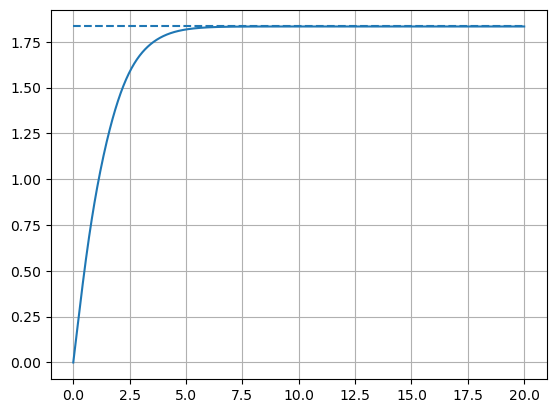

In [48]:
import matplotlib.pyplot as plt
t, y = control.step_response(G[1, 0], T=np.linspace(0, 20, 1000))  # x1 due to u
plt.plot(t, y)
plt.hlines(np.real(G[1, 0](0)), 0, 20, linestyle='--')
#plt.hlines(6/53.5, t[0], t[-1])
plt.grid()

In [51]:
u0 = 1
yinf = np.real(G(0)*u0)
yinf

array([[0.83333333],
       [1.83333333]])